In [1]:
#code 1
import string
import urllib.request as urllib2


def read_file(target_url):

    data = []
    data2 = urllib2.urlopen(target_url)
    # with open(corpus, "r") as file:
    for line in data2:
        line = str(line)
        words_tags = line.strip("\n").split(" ")
        words = [(wt.split("_"))[0] for wt in words_tags][:-1]
        words = " ".join(words)
        result = words.translate(str.maketrans('', '', string.punctuation))
        words = result.split(" ")
        tags = [(wt.split("_"))[1] for wt in words_tags][:-1]
        tags = [t for t in tags if t != 'PU']
        data.append((words, tags))

    return data


In [2]:
#code 2
train_file = "https://raw.githubusercontent.com/manojkumar0408/pos-tagging/master/macmorpho-v3/macmorpho-train.txt"
test_file = "https://raw.githubusercontent.com/manojkumar0408/pos-tagging/master/macmorpho-v3/macmorpho-test.txt"
validation_file = "https://raw.githubusercontent.com/manojkumar0408/pos-tagging/master/macmorpho-v3/macmorpho-dev.txt"

In [3]:
#code 3
train_data = read_file(train_file)
test_data = read_file(test_file)
validation_data = read_file(validation_file)

In [4]:
#code 4
print(len(train_data))
print(len(test_data))
print(len(validation_data))

37948
9987
1997


In [5]:
#code 5
train_data[0]

(['bJersei',
  'atinge',
  'mxc3xa9dia',
  'de',
  'Cr',
  '14',
  'milhxc3xa3o',
  'na',
  'venda',
  'da',
  'Pinhal',
  'em',
  'Sxc3xa3o',
  'Paulo'],
 ['N',
  'V',
  'N',
  'PREP',
  'CUR',
  'NUM',
  'N',
  'PREP+ART',
  'N',
  'PREP+ART',
  'NPROP',
  'PREP',
  'NPROP',
  'NPROP'])

In [6]:
#code 6
words, tags = set([]), set([])

for sentence in train_data:
    for w in sentence[0]:
        words.add(w.lower())
    
    for t in sentence[1]:
        tags.add(t)

for sentence in validation_data:
    for w in sentence[0]:
        words.add(w.lower())
    
    for t in sentence[1]:
        tags.add(t)        

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0 # the special value usd for padding
word2index['-OOV-'] = 1 # the special value used for OOVs

tag2index = {t: i + 1 for i, t in enumerate(list(tags))}
tag2index['-PAD-'] = 0 # the special value used to padding

print(len(words))
print(len(tags))

51798
25


In [7]:
#code 7
print(tag2index.keys())

dict_keys(['KC', 'PRO-KS', 'NUM', 'CUR', 'PREP+PROSUB', 'PROADJ', 'PDEN', 'NPROP', 'PREP', 'PREP+ART', 'PCP', 'PROPESS', 'PREP+ADV', 'V', 'IN', 'ART', 'PREP+PROPESS', 'PREP+PRO-KS', 'ADV-KS', 'ADJ', 'N', 'KS', 'PROSUB', 'ADV', 'PREP+PROADJ', '-PAD-'])


In [8]:
#code 8
def convert_dataset(data, word2index, tag2index):

    new_data = []
    sentences = []
    tags = []
    for sentence in data:
        int_sentence = []
        int_tags = []
        for w in sentence[0]:
            try:
                int_sentence.append(word2index[w.lower()])
            except KeyError:
                int_sentence.append(word2index['-OOV-'])
        for t in sentence[1]:
            int_tags.append(tag2index[t])
        sentences.append(int_sentence)
        tags.append(int_tags)
        new_data.append((int_sentence, int_tags))

    return new_data, sentences, tags

In [9]:
#code 9
train_data, train_sents, train_tags = convert_dataset(train_data, word2index, tag2index)
validation_data, valid_sents, valid_tags = convert_dataset(validation_data, word2index, tag2index)
test_data, test_sents, test_tags = convert_dataset(test_data, word2index, tag2index)

In [10]:
##code 10
train_data[0]

([25022,
  45830,
  13859,
  2732,
  43090,
  1602,
  3653,
  49138,
  50726,
  25387,
  34259,
  20091,
  50136,
  24763],
 [21, 14, 21, 9, 4, 3, 21, 10, 21, 10, 8, 9, 8, 8])

In [11]:
#code 11
MAX_LENGTH = len(max(test_sents, key=len))
print(MAX_LENGTH)

247


In [12]:
#code 12
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_sents = pad_sequences(train_sents, maxlen=MAX_LENGTH, padding='post')
test_sents = pad_sequences(test_sents, maxlen=MAX_LENGTH, padding='post')
valid_sents = pad_sequences(valid_sents, maxlen=MAX_LENGTH, padding='post')
train_tags = pad_sequences(train_tags, maxlen=MAX_LENGTH, padding='post')
test_tags = pad_sequences(test_tags, maxlen=MAX_LENGTH, padding='post')
valid_tags = pad_sequences(valid_tags, maxlen=MAX_LENGTH, padding='post')


In [13]:
#code 13
train_sents[0]

array([25022, 45830, 13859,  2732, 43090,  1602,  3653, 49138, 50726,
       25387, 34259, 20091, 50136, 24763,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [14]:
#code 14
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 247, 128)          6630400   
                                                                 
 bidirectional (Bidirectiona  (None, 247, 512)         788480    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 247, 26)          13338     
 ibuted)                                                         
                                                                 
 activation (Activation)     (None, 247, 26)           0         
                                                                 
Total params: 7,432,218
Trainable params: 7,432,218
Non-trainable params: 0
_________________________________________________________________


In [15]:
#code 15
import numpy as np

def to_categorical(tags, categories):
    cat_sequences = []
    for t in tags:
        cats = []
        for item in t:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

cat_train_tags = to_categorical(train_tags, len(tag2index))
cat_test_tags = to_categorical(test_tags, len(tag2index))
cat_valid_tags = to_categorical(valid_tags, len(tag2index))

In [16]:
#code 16
history = model.fit(train_sents, cat_train_tags, batch_size=256, epochs=5, validation_data=(valid_sents, cat_valid_tags),verbose=2)

Epoch 1/5
149/149 - 28s - loss: 0.2978 - accuracy: 0.9345 - val_loss: 0.1797 - val_accuracy: 0.9458 - 28s/epoch - 190ms/step
Epoch 2/5
149/149 - 21s - loss: 0.1680 - accuracy: 0.9479 - val_loss: 0.1658 - val_accuracy: 0.9481 - 21s/epoch - 144ms/step
Epoch 3/5
149/149 - 21s - loss: 0.1576 - accuracy: 0.9503 - val_loss: 0.1530 - val_accuracy: 0.9514 - 21s/epoch - 138ms/step
Epoch 4/5
149/149 - 20s - loss: 0.1394 - accuracy: 0.9564 - val_loss: 0.1336 - val_accuracy: 0.9575 - 20s/epoch - 136ms/step
Epoch 5/5
149/149 - 20s - loss: 0.1224 - accuracy: 0.9609 - val_loss: 0.1216 - val_accuracy: 0.9603 - 20s/epoch - 137ms/step


In [17]:
#code 17
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [18]:
#code 18
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [19]:
#code 19
scores = model.evaluate(test_sents, cat_test_tags)

313/313 [==============================] - 4s 14ms/step - loss: 0.1146 - accuracy: 0.9628


In [20]:
#y_pred = model.predict_classes(test_sents)
#code 20
y_pred= np.argmax(model.predict(test_sents), axis=-1)

313/313 [==============================] - 5s 12ms/step


In [21]:
#code 21
print(model.metrics_names[1])
print(scores[1]*100)

accuracy
96.27540111541748


In [22]:
#code 22
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


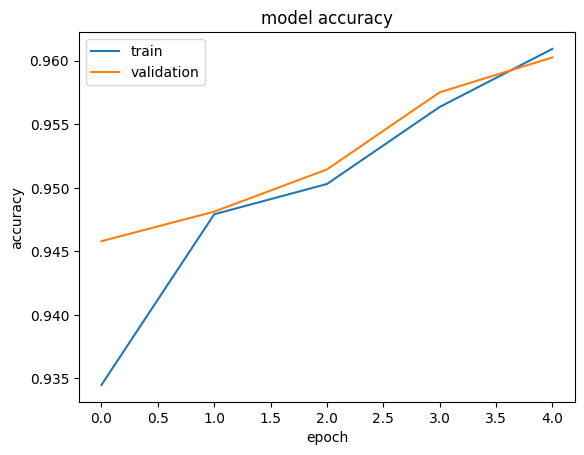

In [23]:
#code 23
# import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


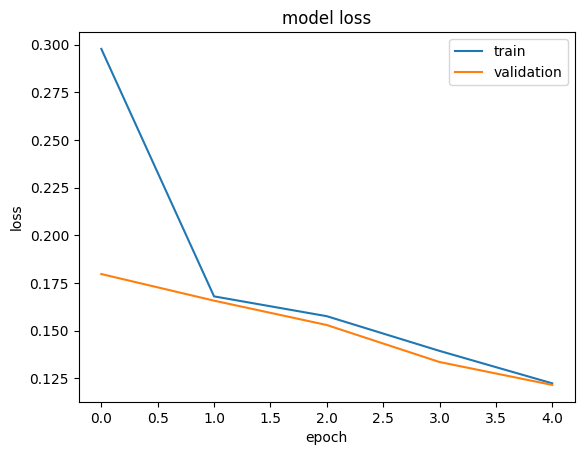

In [24]:
#code 24
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [25]:
#code 25
copytest_data = read_file(test_file)
copytest_data, copytest_sents, copytest_tags = convert_dataset(copytest_data, word2index, tag2index)

In [26]:
#code 26
tags_names = {}
tags_total = {}
tags_accuracy = {}

for t, id_ in tag2index.items():
    tags_names[id_] = t
    tags_total[t] = 0
    tags_accuracy[t] = 0
    
total = 0.0
corrects = 0.0
for j in range(0, len(copytest_tags)):
    tags = copytest_tags[j]
    tags_pred = y_pred[j]
    for i in range(0, len(tags)):
        tags_total[tags_names[tags[i]]] += 1
        total += 1
        if tags[i] == tags_pred[i]:
            tags_accuracy[tags_names[tags[i]]] += 1
            corrects += 1

for t, correct in tags_accuracy.items():
    if t != "-PAD-":
        tags_accuracy[t] = correct/tags_total[t]
        print(t, tags_accuracy[t], tags_total[t])

print(float(corrects)/total)

KC 0.1911277863606268 4531
PRO-KS 0.004100227790432802 2195
NUM 0.027016289233214145 2517
CUR 0.0 296
PREP+PROSUB 0.0 156
PROADJ 0.01726660813579163 3417
PDEN 0.0 1089
NPROP 0.5487258291714688 15618
PREP 0.4468947431159852 16778
PREP+ART 0.2896848698375416 10218
PCP 0.0 3615
PROPESS 0.03826086956521739 2875
PREP+ADV 0.0 31
V 0.5660770560130121 19674
IN 0.0 98
ART 0.5465023847376789 12580
PREP+PROPESS 0.0 126
PREP+PRO-KS 0.0 58
ADV-KS 0.0 230
ADJ 0.0 8461
N 0.5743897714064317 36134
KS 0.14026792750197006 2538
PROSUB 0.0 1563
ADV 0.02685304395806511 5437
PREP+PROADJ 0.0 309
0.3946288128387714


In [27]:
#code 27
from keras.models import model_from_json
from keras.models import load_model

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# json_file = open('keras-results/model3.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("keras-results/model3.h5")

# # summarize model.
print(loaded_model.summary())

Loaded model from disk
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 247, 128)          6630400   
                                                                 
 bidirectional (Bidirectiona  (None, 247, 512)         788480    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 247, 26)          13338     
 ibuted)                                                         
                                                                 
 activation (Activation)     (None, 247, 26)           0         
                                                                 
Total params: 7,432,218
Trainable params: 7,432,218
Non-trainable params: 0
_________________________________________________________________
None
